In [55]:
import numpy as np
from PIL import Image
from pathlib import Path
from skimage import io
import matplotlib.pyplot as plt
from skimage.io import imsave, imread

This code is for PCA of hyperspectral images, and has been replaced by hyperspectral_pca_refactored.ipynb
DEPRECIATED

In [4]:
# image = io.imread('/Users/apple/Sync/Research/maxPEEM - Ni-22Cr/3rd_oxidation_45L/45L-adjusted-Ni2p XAS 845-875 step0p2-1.tif')
# print(image.shape)


# flattened = np.reshape(image,(image.shape[0],image.shape[1]*image.shape[2]))
# print(flattened.shape)


In [5]:
# #plt.imshow(image[0,:,:])

# mean_spectra = np.mean(flattened, axis=1)
# plt.plot(mean_spectra)
# reshaped = np.reshape(flattened[0,:],(1024,1024))
# #plt.imshow(reshaped)
# plt.show()



# #normalize by the max value of the intensity image
# normalized = flattened/5382

In [6]:
# print(np.max(normalized))


In [7]:
# covariance = np.cov(normalized)
# print(covariance.shape)

# (u, s, vh) = np.linalg.svd(covariance)

# print(u.shape)
# print(s.shape)

# plt.plot(s)
# plt.title("Plot of Eigenvalues")

In [8]:
# plt.plot(s[0:10])
# print(s[0], s[1], s[3])

In [9]:
def perform_pca(filename):
    image = io.imread(str(filename))
    print(image.shape)

    flattened = np.reshape(image,(image.shape[0],image.shape[1]*image.shape[2]))
    mean_spectra = np.mean(flattened, axis=1)
    
    
    plt.title("Mean Spectra")
    plt.plot(mean_spectra)
    reshaped = np.reshape(flattened[0,:],(image.shape[1],image.shape[2]))
    #plt.imshow(reshaped)
    plt.show()
    
    normalized_data = np.zeros(flattened.shape)

    for column in range(flattened.shape[1]):
        normalized_data[:,column] = np.subtract(flattened[:,column],mean_spectra)

    #normalize by the max value of the intensity image
    normalized = (normalized_data)/np.max(flattened)
    normalized = flattened/np.max(flattened)


    covariance = np.cov(normalized)
    (u, s, vh) = np.linalg.svd(covariance)

    plt.title("Plot of Eigenvalues")
    plt.plot(s[0:10])
    print(s[0], s[1], s[3])

    return (u,s,vh)


def get_pca_info(results):
    u = results[0]
    s = results[1]
    print(np.sum(s))
    print("target = 0.95 of total data variance: ", np.sum(s)*0.95)
    critical = next(x for x, val in enumerate(np.cumsum(s)) if val > np.sum(s)*0.95)
    print("Critical value: ", critical)

    for i in range(critical+1):
        plt.plot(u[:,i])

    plt.show()

def get_pca_score_image(imname,u,num_components):
    print(image.shape)
    flattened = np.reshape(image,(image.shape[0],image.shape[1]*image.shape[2]))
    print(u[:,0].shape)

    pca_scores = np.dot(flattened.T,u[:,0:10])
    # print(pca_scores.shape)
    pca_score1 = np.dot(flattened.T,np.reshape(u[:,0],(28,1)))
    pca_score2 = np.dot(flattened.T, np.reshape(u[:,1],(28,1)))
    image_score1 = (np.reshape(pca_score1,(1024,1024))-np.min(pca_score1))/(np.max(pca_score1)-np.min(pca_score1))
    image_score2 = (np.reshape(pca_score2,(1024,1024))-np.min(pca_score2))/(np.max(pca_score2)-np.min(pca_score2))
    print(type(image_score2))
    # print(image_score2.shape)

    imsave("VB 15 L component 2.png", image_score2)
    imsave("VB 15 L component 1.png", image_score1)


    


(151, 1024, 1024)


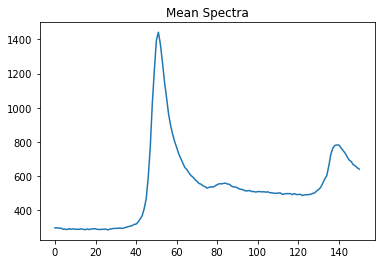

0.9059578873483294 0.036007787045122475 0.004092060440843564
(151, 151)


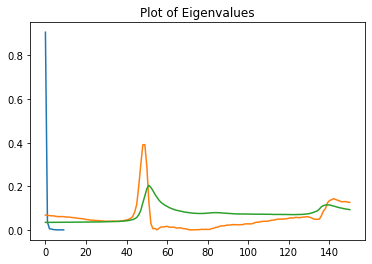

In [10]:
results = perform_pca('/Users/apple/Sync/Research/maxPEEM - Ni-22Cr/3rd_oxidation_45L/45L-adjusted-Ni2p XAS 845-875 step0p2-1.tif')
u = results[0]
print(u.shape)
plt.plot(np.abs(u[:,1]))
plt.plot(np.abs(u[:,0]))


(151, 151)


Text(0.5, 1.0, 'PCA components explaining 95% variance for Ni at 45L')

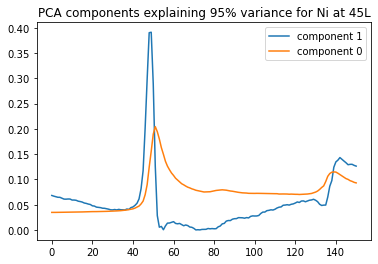

In [11]:
u = results[0]
print(u.shape)
plt.plot(np.abs(u[:,1]))
plt.plot(np.abs(u[:,0]))
plt.legend(['component 1', 'component 0'])
plt.title("PCA components explaining 95% variance for Ni at 45L")

0.9692810657081914
target = 0.95 of total data variance:  0.9208170124227818
Critical value:  1


Text(0.5, 1.0, 'Cumulative sum of the principal components')

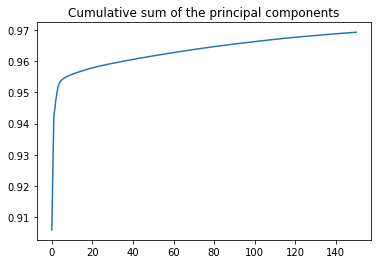

In [12]:
s = results[1]
print(np.sum(s))
print("target = 0.95 of total data variance: ", np.sum(s)*0.95)
critical = next(x for x, val in enumerate(np.cumsum(s)) if val > np.sum(s)*0.95)
print("Critical value: ", critical)
plt.plot(np.cumsum(s))
plt.title("Cumulative sum of the principal components")

(101, 512, 512)


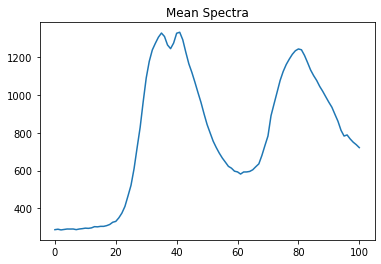

0.6032910634146592 0.08930689296395698 0.002929821981337352


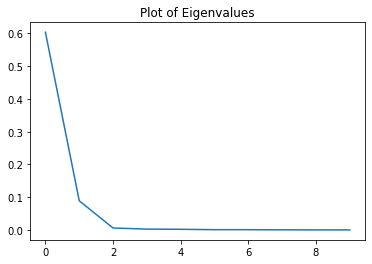

In [13]:
results1 = perform_pca('/Users/apple/Sync/Research/maxPEEM - Ni-22Cr/3rd_oxidation_45L/45L-adjusted-Cr XAS 570-595 step0p2.tif')


(101, 101)


Text(0.5, 1.0, 'PCA components explaining 95% variance for Cr at 45L')

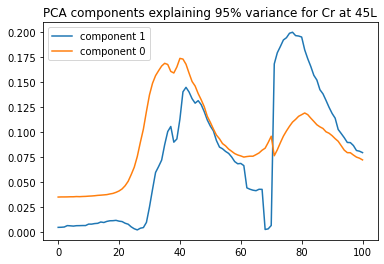

In [14]:
u = results1[0]

print(u.shape)
plt.plot(np.abs(u[:,1]))
plt.plot(np.abs(u[:,0]))
plt.legend(['component 1', 'component 0'])
plt.title("PCA components explaining 95% variance for Cr at 45L")



0.7157956767813981
target = 0.95 of total data variance:  0.6800058929423282
Critical value:  1


Text(0.5, 1.0, 'Cumulative sum of the principal components')

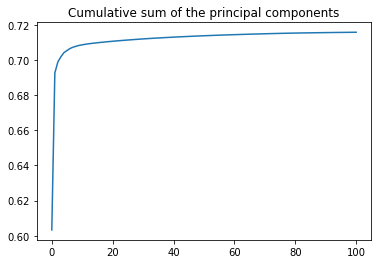

In [15]:
s = results1[1]
print(np.sum(s))
print("target = 0.95 of total data variance: ", np.sum(s)*0.95)
critical = next(x for x, val in enumerate(np.cumsum(s)) if val > np.sum(s)*0.95)
print("Critical value: ", critical)
plt.plot(np.cumsum(s))
plt.title("Cumulative sum of the principal components")

(10, 1024, 1024)


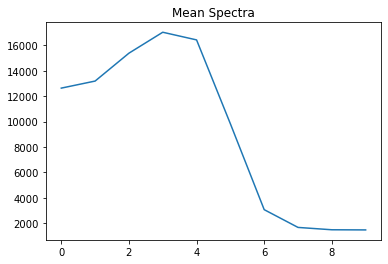

0.1082088691056669 0.003918686845890284 0.0010408458230219938


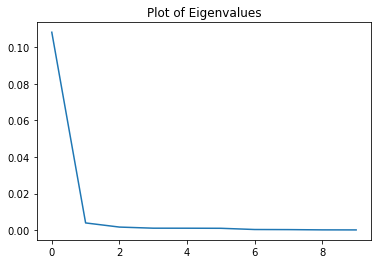

In [16]:
results2 = perform_pca('/Users/apple/Sync/Research/maxPEEM - Ni-22Cr/3rd_oxidation_45L/VB-PEEMfrom91to96eVstep0p2-2_17-26_adjusted.tif')

(10, 10)


Text(0.5, 1.0, 'PCA components explaining 95% variance for VB at 45L')

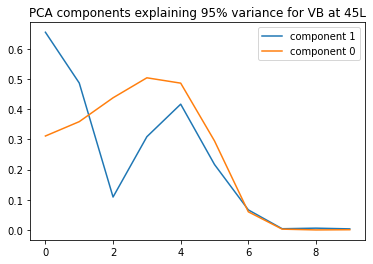

In [17]:
u = results2[0]

print(u.shape)
plt.plot(np.abs(u[:,1]))
plt.plot(np.abs(u[:,0]))
plt.legend(['component 1', 'component 0'])
plt.title("PCA components explaining 95% variance for VB at 45L")


0.11762871485672613
target = 0.95 of total data variance:  0.11174727911388982
Critical value:  1


Text(0.5, 1.0, 'Cumulative sum of the principal components')

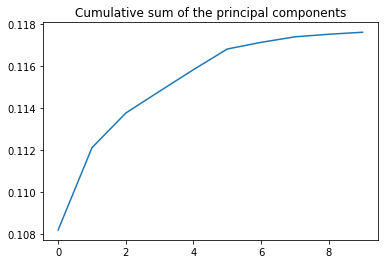

In [18]:
s = results2[1]
print(np.sum(s))
print("target = 0.95 of total data variance: ", np.sum(s)*0.95)
critical = next(x for x, val in enumerate(np.cumsum(s)) if val > np.sum(s)*0.95)
print("Critical value: ", critical)
plt.plot(np.cumsum(s))
plt.title("Cumulative sum of the principal components")

(28, 1024, 1024)


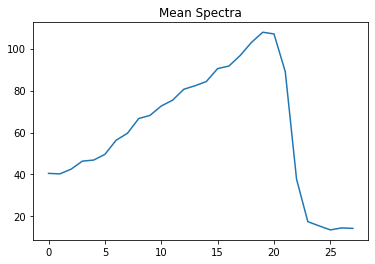

0.00955991657568514 0.0004216613935065867 6.817090138771317e-05


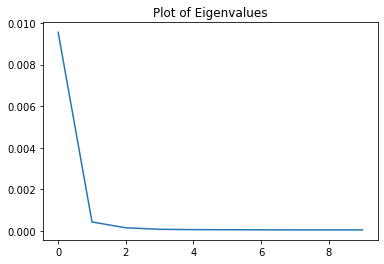

In [19]:
results3 = perform_pca('/Users/apple/Sync/Research/maxPEEM - Ni-22Cr/2nd_oxidation _15L/15L-VBPEEM91eVto96p4@0p2eVstep-hn100eV.tif')

0.010869461608580735
target = 0.95 of total data variance:  0.010325988528151697
Critical value:  6
(28, 28)


Text(0.5, 1.0, 'PCA components explaining 95% variance for VB at 15L')

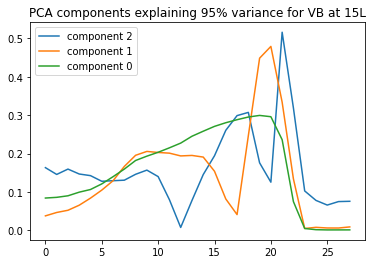

In [28]:
u = results3[0]
s = results3[1]
print(np.sum(s))
print("target = 0.95 of total data variance: ", np.sum(s)*0.95)
critical = next(x for x, val in enumerate(np.cumsum(s)) if val > np.sum(s)*0.95)
print("Critical value: ", critical)
print(u.shape)
# plt.plot(np.abs(u[:,6]))
# plt.plot(np.abs(u[:,5]))
# plt.plot(np.abs(u[:,4]))
# plt.plot(np.abs(u[:,3]))
plt.plot(np.abs(u[:,2]))
plt.plot(np.abs(u[:,1]))
plt.plot(np.abs(u[:,0]))
#plt.legend(['component 6', 'component 5','component 4', 'component 3', 'component 2', 'component 1', 'component 0'])
plt.legend(['component 2', 'component 1', 'component 0'])
plt.title("PCA components explaining 95% variance for VB at 15L")

(28, 1024, 1024)
(28,)
<class 'numpy.ndarray'>
1.0 0.0


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: setting an array element with a sequence.

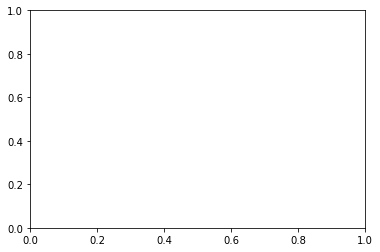

In [45]:
from skimage.io import imsave, imread

image = io.imread(str('/Users/apple/Sync/Research/maxPEEM - Ni-22Cr/2nd_oxidation _15L/15L-VBPEEM91eVto96p4@0p2eVstep-hn100eV.tif'))
print(image.shape)
flattened = np.reshape(image,(image.shape[0],image.shape[1]*image.shape[2]))
print(u[:,0].shape)

pca_scores = np.dot(flattened.T,u[:,0:10])
# print(pca_scores.shape)
pca_score1 = np.dot(flattened.T,np.reshape(u[:,0],(28,1)))
pca_score2 = np.dot(flattened.T, np.reshape(u[:,1],(28,1)))
image_score1 = (np.reshape(pca_score1,(1024,1024))-np.min(pca_score1))/(np.max(pca_score1)-np.min(pca_score1))
image_score2 = (np.reshape(pca_score2,(1024,1024))-np.min(pca_score2))/(np.max(pca_score2)-np.min(pca_score2))
print(type(image_score2))
# print(image_score2.shape)

print(np.max(image_score2),np.min(image_score2))

imsave("VB 15 L component 2.png", image_score2)
imsave("VB 15 L component 1.png", image_score1)
#print(normed_score2)
plt.imshow(image_score1)
plt.colorbar

# score1 = Image.fromarray((pca_score1-np.min(pca_score1))/np.max(pca_score1))
# score1 = score1.convert("RGB")
# score1.save("VB 15 L component 2.png")
# #image_score = np.reshape(pca_scores,())

0.0 1.0
0.971772731571289
<class 'numpy.ndarray'>


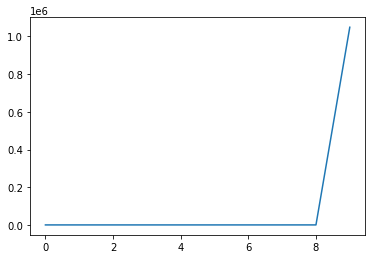

In [54]:
image_histogram = np.histogram(image_score1)
print(np.min(image_score1), np.max(image_score1))
print(np.median(image_score1))
print(type(image_histogram[0]))
plt.plot(image_histogram[0])

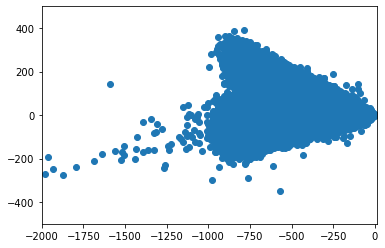

In [57]:
plt.scatter(pca_score1,pca_score2)
plt.xlim([-2000,10])
plt.ylim([-500,500])
plt.show()


(151, 1024, 1024)


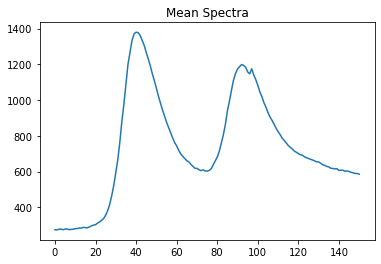

2.4311985133734715 0.09152451186077697 0.0038462462125324766


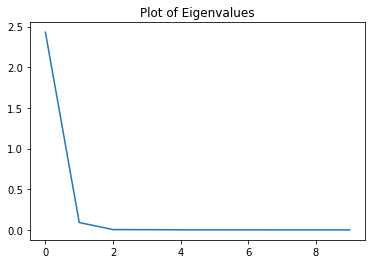

In [22]:
results4 = perform_pca('/Users/apple/Sync/Research/maxPEEM - Ni-22Cr/2nd_oxidation _15L/15L-Cr XAS 570-595 step0p1667_adjusted.tif')

2.5662095790004926
target = 0.95 of total data variance:  2.4378991000504677
Critical value:  1
(151, 151)


Text(0.5, 1.0, 'PCA components explaining 95% variance for Cr at 15L')

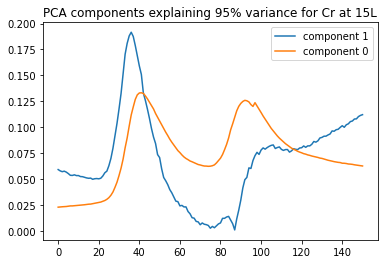

In [23]:
u = results4[0]
s = results4[1]
print(np.sum(s))
print("target = 0.95 of total data variance: ", np.sum(s)*0.95)
critical = next(x for x, val in enumerate(np.cumsum(s)) if val > np.sum(s)*0.95)
print("Critical value: ", critical)
print(u.shape)
plt.plot(np.abs(u[:,1]))
plt.plot(np.abs(u[:,0]))
plt.legend(['component 1', 'component 0'])
plt.title("PCA components explaining 95% variance for Cr at 15L")

(151, 1024, 1024)


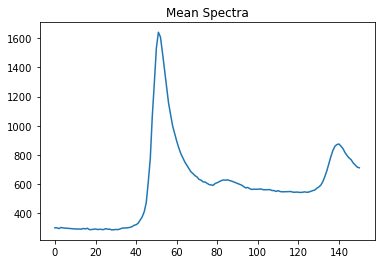

1.1756907138979662 0.03649288110175348 0.0012849486894517604


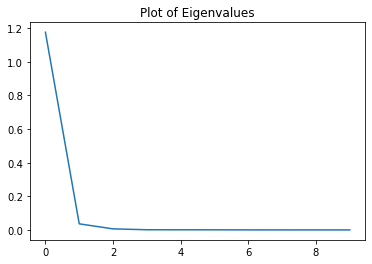

In [24]:
results5 = perform_pca('/Users/apple/Sync/Research/maxPEEM - Ni-22Cr/2nd_oxidation _15L/15L-corrected-Ni2p XAS 845-875 step0p2-1_adjusted.tif')

1.2384729303154518
target = 0.95 of total data variance:  1.1765492837996792
Critical value:  1
(151, 151)


Text(0.5, 1.0, 'PCA components explaining 95% variance for Ni at 15L')

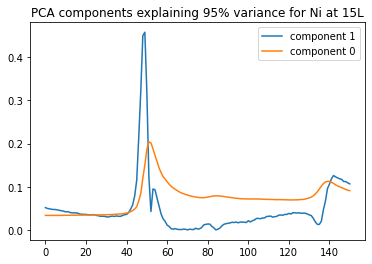

In [25]:
u = results5[0]
s = results5[1]
print(np.sum(s))
print("target = 0.95 of total data variance: ", np.sum(s)*0.95)
critical = next(x for x, val in enumerate(np.cumsum(s)) if val > np.sum(s)*0.95)
print("Critical value: ", critical)
print(u.shape)
plt.plot(np.abs(u[:,1]))
plt.plot(np.abs(u[:,0]))
plt.legend(['component 1', 'component 0'])
plt.title("PCA components explaining 95% variance for Ni at 15L")